In [110]:
# %load ../imports.py
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt

In [111]:
DATA_PATH = "../../dataset/public/titanic.csv"

In [112]:
data = pd.read_csv(
    DATA_PATH
)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [114]:
size_before = len(data)
data = data.dropna()
size_after = len(data)

In [115]:
print(
    f"Size before: {size_before}",
    f"Size after: {size_after}",
    f"Lost %: {(size_before - size_after)/size_before:.2f}",
    sep='\n'
)

Size before: 891
Size after: 183
Lost %: 0.79


In [116]:
data = data.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, 1 to 889
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  183 non-null    int64  
 1   Pclass    183 non-null    int64  
 2   Sex       183 non-null    object 
 3   Age       183 non-null    float64
 4   SibSp     183 non-null    int64  
 5   Parch     183 non-null    int64  
 6   Fare      183 non-null    float64
 7   Embarked  183 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 12.9+ KB


In [117]:
print(data['Sex'].unique(), data['Embarked'].unique())
sex_mapping = {'female': 0, 'male': 1}
embarked_mapping = {'C': 0, 'S': 1, 'Q': 2}

data['Sex'] = data['Sex'].map(sex_mapping)
data['Embarked'] = data['Embarked'].map(embarked_mapping)
data.head()

['female' 'male'] ['C' 'S' 'Q']


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,1,0,38.0,1,0,71.2833,0
3,1,1,0,35.0,1,0,53.1000,1
6,0,1,1,54.0,0,0,51.8625,1
10,1,3,0,4.0,1,1,16.7000,1
11,1,1,0,58.0,0,0,26.5500,1


In [118]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

reg_parameters = data.drop(['Survived'], axis=1)
target = data['Survived']

scaler = StandardScaler()
scaled_params = scaler.fit_transform(reg_parameters)

X_train, X_test, y_train, y_test = train_test_split(
    scaled_params,
    target,
    test_size=0.2,
    random_state=0,
)
print(X_test[:5], y_test[:5])

[[ 1.57411183 -1.03901177 -0.81240778 -0.7230443  -0.63172982 -0.85226764
  -1.31780636]
 [-0.37225618  0.96245301  0.72594878 -0.7230443  -0.63172982 -0.35044437
   0.69184834]
 [-0.37225618 -1.03901177  1.43102886 -0.7230443  -0.63172982  0.89098058
  -1.31780636]
 [-0.37225618  0.96245301  1.23873429 -0.7230443  -0.63172982 -0.63282282
   0.69184834]
 [-0.37225618 -1.03901177  0.21316326  0.83362754  0.69708118  0.05878503
  -1.31780636]] 473    1
110    0
195    1
492    0
835    1
Name: Survived, dtype: int64


In [119]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, ConfusionMatrixDisplay

lr_model = LogisticRegression(random_state=0)
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [120]:
y_pred = lr_model.predict(X_test)

Accuracy: 0.86
F1 score: 0.92


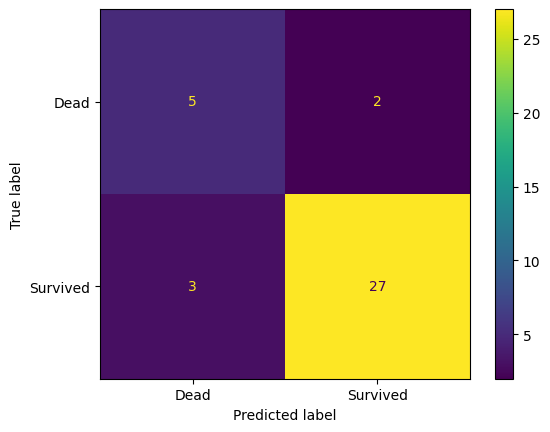

In [121]:
print(
    f"Accuracy: {accuracy_score(y_test, y_pred):.2}",
    f"F1 score: {f1_score(y_test, y_pred):.2}",
    sep='\n'
)
display = ConfusionMatrixDisplay.from_estimator(
    lr_model,
    X_test,
    y_test,
    display_labels=['Dead', 'Survived']
)
plt.show()

In [122]:
reg_params_no_embark = data.drop(['Embarked', 'Survived'], axis=1)

scaler_no_embark = StandardScaler()
scaled_params_no_embark = scaler_no_embark.fit_transform(reg_params_no_embark)

X_train_ne, X_test_ne, y_train_ne, y_test_ne = train_test_split(
    scaled_params_no_embark,
    target,
    test_size=0.2,
    random_state=0
)

In [123]:
lr_model_ne = LogisticRegression(random_state=0)
lr_model_ne.fit(X_train_ne, y_train_ne)

LogisticRegression(random_state=0)

In [124]:
y_pred_ne = lr_model_ne.predict(X_test_ne)

Accuracy: 0.81
F1 score: 0.88


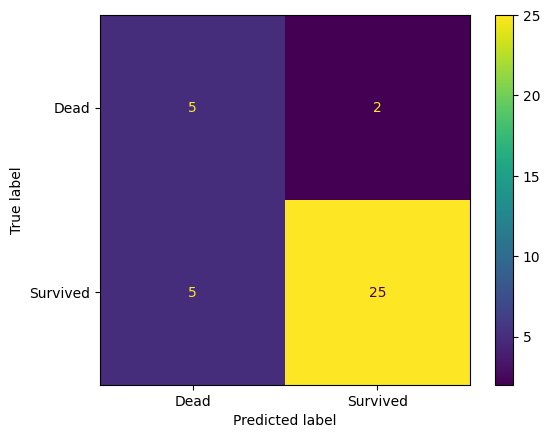

In [125]:
print(
    f"Accuracy: {accuracy_score(y_test_ne, y_pred_ne):.2}",
    f"F1 score: {f1_score(y_test_ne, y_pred_ne):.2}",
    sep='\n'
)
display_ne = ConfusionMatrixDisplay.from_estimator(
    lr_model_ne,
    X_test_ne,
    y_test_ne,
    display_labels=['Dead', 'Survived']
)
plt.show()

Вывод: Параметр Embarked влияет на качество модели заметно, но не критически. На тестовой выборке добавилось две ошибки первого рода, а в значениях метрик точность упала на 5%, а F1 на 4%. 